In [1]:
import numpy as np
import pandas as pd
import pyspark

merged_dataset = pd.read_csv('merged_data.csv')
merged_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,14840,guariba,SP,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118302,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,17602,tupa,SP,baby
118303,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,8290,sao paulo,SP,home_appliances_2
118304,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,37175,ilicinea,MG,computers_accessories
118305,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,37175,ilicinea,MG,computers_accessories


In [2]:
print(merged_dataset.isna().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20


In [3]:
review_deletion_columns = ['review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
merged_dataset.drop(columns=review_deletion_columns, inplace=True)
merged_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,1,credit_card,1,18.12,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,3,voucher,1,2.00,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,2,voucher,1,18.59,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,13.0,19.0,1,boleto,1,141.46,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.0,21.0,1,credit_card,3,179.12,14840,guariba,SP,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118302,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,10.0,40.0,1,credit_card,3,195.00,17602,tupa,SP,baby
118303,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,90.0,22.0,1,credit_card,5,271.01,8290,sao paulo,SP,home_appliances_2
118304,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,20.0,1,credit_card,4,441.16,37175,ilicinea,MG,computers_accessories
118305,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,20.0,1,credit_card,4,441.16,37175,ilicinea,MG,computers_accessories


In [4]:
merged_dataset.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

In [5]:
merged_dataset.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,118307.000000,118307.000000,118307.000000,118307.000000,116598.000000,116598.000000,116598.000000,118287.000000,118287.000000,118287.000000,118287.000000,118307.000000,118307.000000,118307.000000,118307.000000
mean,35051.177276,1.196523,120.648522,20.032823,48.767878,785.961389,2.205192,2112.278949,30.265507,16.619722,23.074979,1.094069,2.943317,172.575102,24440.955700
std,29824.786247,0.699474,184.111631,15.836814,10.033390,652.591284,1.717463,3786.738987,16.189413,13.453754,11.749234,0.728579,2.777877,267.110727,27571.840716
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.850000,6429.000000
50%,24310.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.200000,13660.000000
75%,58640.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.260000,27967.500000
max,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


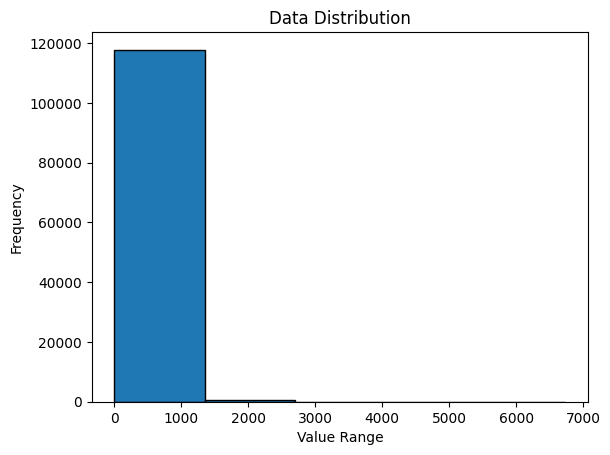

In [6]:
import matplotlib.pyplot as plt
plt.hist(merged_dataset['price'], bins=5, edgecolor='black')  # Adjust bins as needed
plt.title('Data Distribution')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

In [7]:
numerical_columns = ['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_sequential',	'payment_installments',	'payment_value', 'seller_zip_code_prefix']
categorical_columns = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_city', 'customer_state', 'product_id', 'seller_id', 'shipping_limit_date', 'product_category_name', 'payment_type', 'seller_city', 'seller_state', 'product_category_name_english']
merged_dataset['order_delivered_carrier_date'] = merged_dataset['order_delivered_carrier_date'].astype(str)
merged_dataset['order_approved_at'] = merged_dataset['order_approved_at'].astype(str)
merged_dataset['order_delivered_customer_date'] = merged_dataset['order_delivered_customer_date'].astype(str)
merged_dataset['product_category_name'] = merged_dataset['product_category_name'].astype(str)
merged_dataset['product_category_name_english'] = merged_dataset['product_category_name_english'].astype(str)

for col in numerical_columns:
    merged_dataset[col].fillna(merged_dataset[col].mean(), inplace=True)

for col in categorical_columns:
    merged_dataset[col].fillna(merged_dataset[col].mode(), inplace=True)
merged_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments

In [8]:
from datetime import datetime
merged_dataset['order_purchase_timestamp'] = pd.to_datetime(merged_dataset['order_purchase_timestamp'])
earliest_date = merged_dataset['order_purchase_timestamp'].min()

rfm_data = merged_dataset.groupby('customer_id').agg(
    recency=('order_purchase_timestamp', lambda x: (earliest_date - x.max()).days),  # Recency: days since last purchase
    frequency=('order_purchase_timestamp', 'count'),  # Frequency: number of purchases
    monetary=('price', 'sum')  # Monetary: total amount spent
).reset_index()
print(rfm_data)
merged_dataset['order_purchase_timestamp'] = merged_dataset['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

                            customer_id  recency  frequency  monetary
0      00012a2ce6f8dcda20d059ce98491703     -436          1     89.80
1      000161a058600d5901f007fab4c27140     -315          1     54.90
2      0001fd6190edaaf884bcaf3d49edf079     -177          1    179.99
3      0002414f95344307404f0ace7a26f1d5     -346          1    149.90
4      000379cdec625522490c315e70c7a9fb     -575          1     93.00
...                                 ...      ...        ...       ...
98660  fffcb937e9dd47a13f05ecb8290f4d3e     -559          1     78.00
98661  fffecc9f79fd8c764f843e9951b11341     -571          3    164.70
98662  fffeda5b6d849fbd39689bb92087f431     -625          1     47.90
98663  ffff42319e9b2d713724ae527742af25     -647          1    199.90
98664  ffffa3172527f765de70084a7e53aae8     -363          2     21.80

[98665 rows x 4 columns]


In [9]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
for col in categorical_columns:
    merged_dataset[col] = label_encoder.fit_transform(merged_dataset[col])
merged_dataset.nunique()

order_id                         98665
customer_id                      98665
order_status                         7
order_purchase_timestamp           615
order_approved_at                90174
order_delivered_carrier_date     81017
order_delivered_customer_date    95664
order_estimated_delivery_date      449
customer_unique_id               95419
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93317
price                             5968
freight_value                     6999
product_category_name               74
product_name_lenght                 67
product_description_lenght        2961
product_photos_qty                  20
product_weight_g                  2205
product_length_cm                  100
product_height_cm                  103
product_width_cm         

In [10]:
scaler = prep.StandardScaler()
scaled_df = scaler.fit_transform(merged_dataset[merged_dataset.columns])
scaled_df = pd.DataFrame(scaled_df, columns = merged_dataset.columns)
for i in merged_dataset.columns:
    merged_dataset[i] = scaled_df[i]
merged_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,1.369492,0.424356,-0.107888,-0.582341,-0.745058,-0.789622,-0.804201,-0.624728,-0.049341,-1.069658,...,-0.640750,-0.857577,-0.129113,0.113200,-0.699572,-0.578246,-0.547334,-0.188675,0.527922,0.419280
1,1.369492,0.424356,-0.107888,-0.582341,-0.745058,-0.789622,-0.804201,-0.624728,-0.049341,-1.069658,...,-0.640750,-0.857577,2.615967,3.207909,-0.699572,-0.638596,-0.547334,-0.188675,0.527922,0.419280
2,1.369492,0.424356,-0.107888,-0.582341,-0.745058,-0.789622,-0.804201,-0.624728,-0.049341,-1.069658,...,-0.640750,-0.857577,1.243427,3.207909,-0.699572,-0.576487,-0.547334,-0.188675,0.527922,0.419280
3,-0.596461,0.666952,-0.107888,1.349462,1.436829,1.309723,1.426508,1.329064,0.640014,0.427895,...,-0.269073,-0.346860,-0.129113,-1.434154,-0.699572,-0.116488,0.258564,-1.781601,0.527922,0.901597
4,-0.762711,-0.837424,-0.107888,1.447689,1.557310,1.380738,1.534412,1.486153,-0.941800,1.348341,...,0.176939,-0.176621,-0.129113,0.113200,0.020405,0.024503,-0.348217,-0.852394,0.527922,-1.509988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118302,-0.383926,-1.296830,-0.107888,0.249317,0.165029,0.187269,0.158311,0.239261,1.227835,-0.782211,...,-0.492079,1.440649,-0.129113,0.113200,0.020405,0.083954,-0.248042,1.319778,0.527922,-1.466141
118303,0.048450,-1.365592,-0.107888,-0.818086,-0.936038,-0.989968,-0.898053,-0.762180,-0.167967,0.364424,...,5.454745,-0.091502,-0.129113,0.113200,0.740383,0.368519,-0.585780,0.951716,0.527922,0.243892
118304,-1.487235,0.703753,-0.107888,0.059411,-0.069030,-0.055280,-0.093406,0.150898,-0.640726,-0.213453,...,0.251274,-0.261741,-0.129113,0.113200,0.380394,1.005523,0.461852,-0.767920,-2.366566,-1.071518
118305,-1.487235,0.703753,-0.107888,0.059411,-0.069030,-0.055280,-0.093406,0.150898,-0.640726,-0.213453,...,0.251274,-0.261741,-0.129113,0.113200,0.380394,1.005523,0.461852,-0.767920,-2.366566,-1.071518


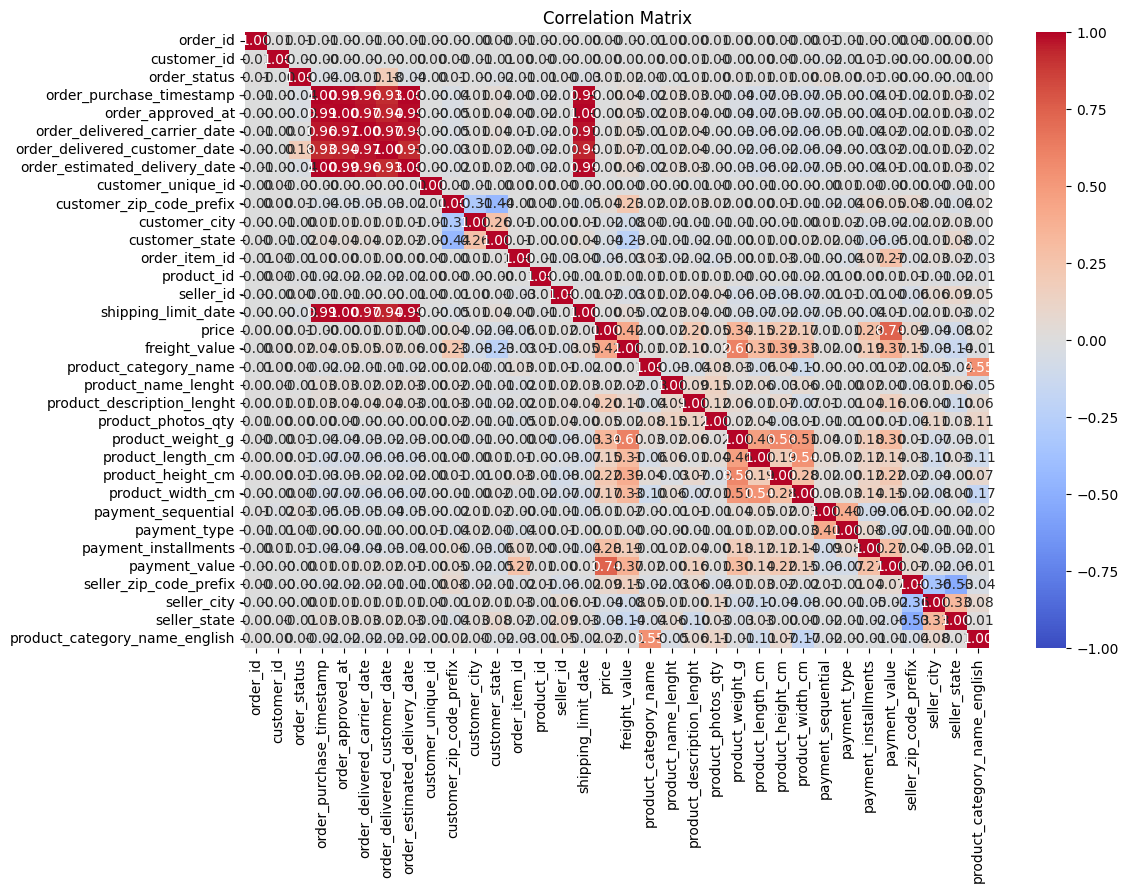

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [12]:
correlated_columns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']
merged_dataset.drop(columns=correlated_columns, inplace=True)
merged_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,1.369492,0.424356,-0.107888,-0.582341,-0.049341,-1.069658,1.003223,0.893762,-0.280959,0.106036,...,-0.640750,-0.857577,-0.129113,0.113200,-0.699572,-0.578246,-0.547334,-0.188675,0.527922,0.419280
1,1.369492,0.424356,-0.107888,-0.582341,-0.049341,-1.069658,1.003223,0.893762,-0.280959,0.106036,...,-0.640750,-0.857577,2.615967,3.207909,-0.699572,-0.638596,-0.547334,-0.188675,0.527922,0.419280
2,1.369492,0.424356,-0.107888,-0.582341,-0.049341,-1.069658,1.003223,0.893762,-0.280959,0.106036,...,-0.640750,-0.857577,1.243427,3.207909,-0.699572,-0.576487,-0.547334,-0.188675,0.527922,0.419280
3,-0.596461,0.666952,-0.107888,1.349462,0.640014,0.427895,-1.623106,-2.077684,-0.280959,-0.508786,...,-0.269073,-0.346860,-0.129113,-1.434154,-0.699572,-0.116488,0.258564,-1.781601,0.527922,0.901597
4,-0.762711,-0.837424,-0.107888,1.447689,-0.941800,1.348341,1.378413,-1.511694,-0.280959,0.568922,...,0.176939,-0.176621,-0.129113,0.113200,0.020405,0.024503,-0.348217,-0.852394,0.527922,-1.509988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118302,-0.383926,-1.296830,-0.107888,0.249317,1.227835,-0.782211,0.512080,0.893762,-0.280959,1.557138,...,-0.492079,1.440649,-0.129113,0.113200,0.020405,0.083954,-0.248042,1.319778,0.527922,-1.466141
118303,0.048450,-1.365592,-0.107888,-0.818086,-0.167967,0.364424,0.132749,-2.077684,-0.280959,0.762698,...,5.454745,-0.091502,-0.129113,0.113200,0.740383,0.368519,-0.585780,0.951716,0.527922,0.243892
118304,-1.487235,0.703753,-0.107888,0.059411,-0.640726,-0.213453,-0.371645,-0.096720,-0.280959,1.122674,...,0.251274,-0.261741,-0.129113,0.113200,0.380394,1.005523,0.461852,-0.767920,-2.366566,-1.071518
118305,-1.487235,0.703753,-0.107888,0.059411,-0.640726,-0.213453,-0.371645,-0.096720,1.148693,1.122674,...,0.251274,-0.261741,-0.129113,0.113200,0.380394,1.005523,0.461852,-0.767920,-2.366566,-1.071518


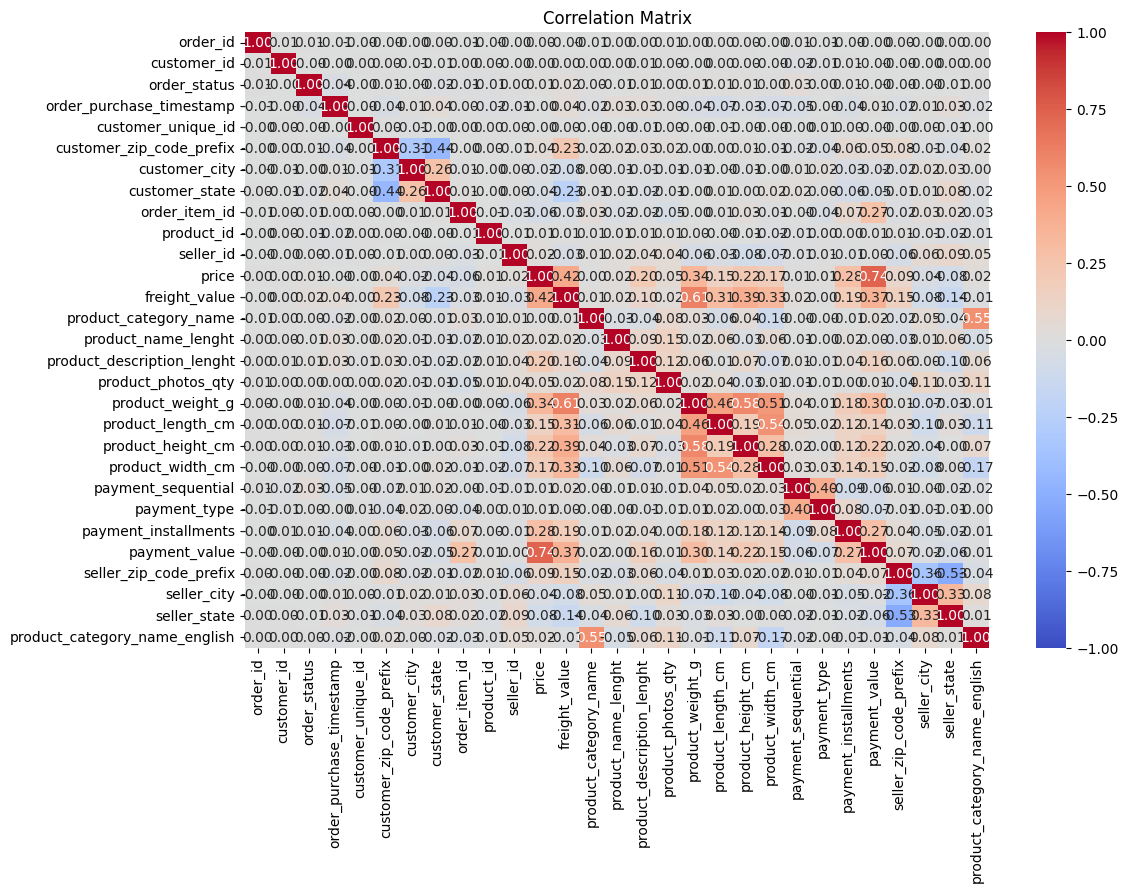

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [14]:
merged_dataset.nunique()

order_id                         98665
customer_id                      98665
order_status                         7
order_purchase_timestamp           615
customer_unique_id               95419
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
order_item_id                       21
product_id                       32951
seller_id                         3095
price                             5968
freight_value                     6999
product_category_name               74
product_name_lenght                 67
product_description_lenght        2961
product_photos_qty                  20
product_weight_g                  2205
product_length_cm                  100
product_height_cm                  103
product_width_cm                    96
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28938
seller_zip_code_prefix   

K-Means clustering

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

Optimal number of clusters: 2


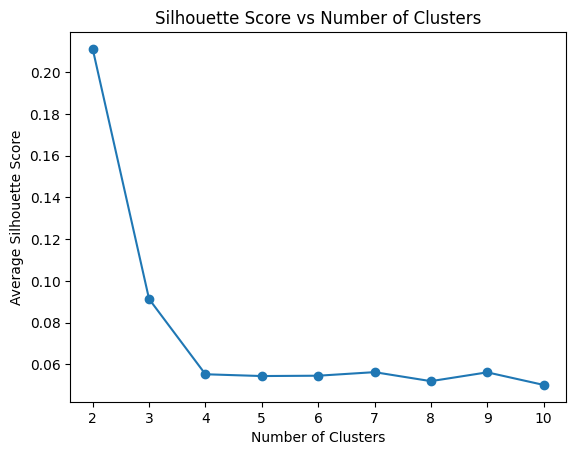

In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming merged_dataset is a pandas DataFrame with numerical data for clustering
numerical_columns = merged_dataset.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = merged_dataset[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set up KFold cross-validation (e.g., 5-folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Range of cluster numbers to try (you can experiment with different ranges)
cluster_range = range(2, 11)

# Store results for each k value
silhouette_scores = []

# K-Fold Cross-validation loop
for k in cluster_range:
    fold_scores = []
    for train_idx, test_idx in kf.split(scaled_data):
        # Split the data into training and test sets based on indices
        X_train, X_test = scaled_data[train_idx], scaled_data[test_idx]

        # Apply KMeans clustering on training data
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_train)

        # Calculate silhouette score for test set
        cluster_labels = kmeans.predict(X_test)
        score = silhouette_score(X_test, cluster_labels)
        fold_scores.append(score)

    # Average silhouette score for this number of clusters across all folds
    avg_score = np.mean(fold_scores)
    silhouette_scores.append(avg_score)

# Find the best number of clusters
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Plot the silhouette scores for each cluster number
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

X = merged_dataset.drop(columns= ['customer_id', 'price'])

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can change n_clusters to any number
kmeans.fit(X)

# Step 4: Assign clusters to the dataset
X['cluster'] = kmeans.labels_

# Show the result
print(X.head())

# You can also inspect the cluster centers:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

silhouette = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette}")

# 2. Adjusted Rand Index (ARI) - Comparing with 'price' as the true labels (in this case, clusters based on price)
# We need to discretize the price for comparison purposes. For example, you can create bins based on price ranges.
price_bins = pd.cut(merged_dataset["price"], bins=2, labels=[0, 1])
ari = adjusted_rand_score(price_bins, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari}")

# 3. Davies-Bouldin Index
dbi = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {dbi}")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   order_id  order_status  order_purchase_timestamp  customer_unique_id  \
0  1.369492     -0.107888                 -0.582341           -0.049341   
1  1.369492     -0.107888                 -0.582341           -0.049341   
2  1.369492     -0.107888                 -0.582341           -0.049341   
3 -0.596461     -0.107888                  1.349462            0.640014   
4 -0.762711     -0.107888                  1.447689           -0.941800   

   customer_zip_code_prefix  customer_city  customer_state  order_item_id  \
0                 -1.069658       1.003223        0.893762      -0.280959   
1                 -1.069658       1.003223        0.893762      -0.280959   
2                 -1.069658       1.003223        0.893762      -0.280959   
3                  0.427895      -1.623106       -2.077684      -0.280959   
4                  1.348341       1.378413       -1.511694      -0.280959   

   product_id  seller_id  ...  product_width_cm  payment_sequential  \
0    0.106036  

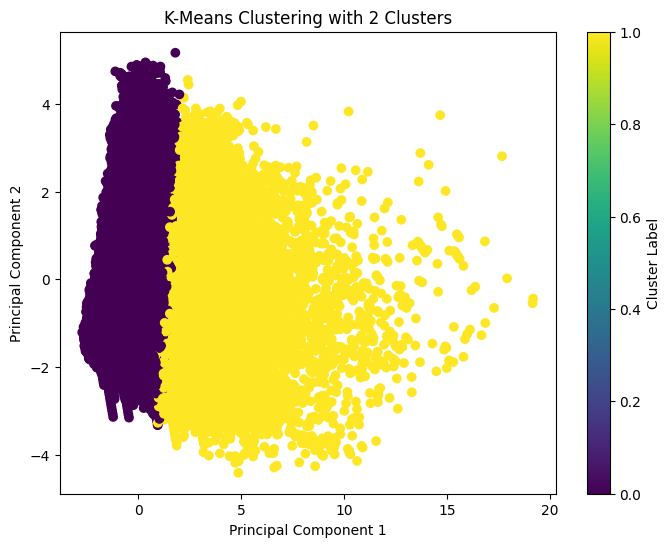

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=X['cluster'], cmap='viridis', marker='o')
plt.title("K-Means Clustering with 2 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

Gaussian Mixture Model

In [18]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

# Step 1: Prepare data by dropping 'customer_id' and 'price'
gmm_X = merged_dataset.drop(columns=['customer_id', 'price'])

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gmm_X)

# Step 3: Apply GMM clustering
gmm = GaussianMixture(n_components=2, random_state=42)  # You can change n_components to any number
gmm.fit(X_scaled)

# Step 4: Assign clusters to the dataset
gmm_X['cluster'] = gmm.predict(X_scaled)

# Show the result
print(gmm_X.head())

# Cluster centers (means of the Gaussian components)
print("Cluster Centers (means of Gaussian components):")
print(gmm.means_)

# Step 5: Evaluate Clustering Metrics

# 1. Silhouette Score
silhouette = silhouette_score(X_scaled, gmm_X['cluster'])
print(f"Silhouette Score: {silhouette}")

# 2. Adjusted Rand Index (ARI) - Comparing with 'price' as the true labels (need to discretize price)
price_bins = pd.cut(merged_dataset["price"], bins=2, labels=[0, 1])  # Discretizing price into two bins
ari = adjusted_rand_score(price_bins, gmm_X['cluster'])
print(f"Adjusted Rand Index (ARI): {ari}")

# 3. Davies-Bouldin Index
dbi = davies_bouldin_score(X_scaled, gmm_X['cluster'])
print(f"Davies-Bouldin Index: {dbi}")


   order_id  order_status  order_purchase_timestamp  customer_unique_id  \
0  1.369492     -0.107888                 -0.582341           -0.049341   
1  1.369492     -0.107888                 -0.582341           -0.049341   
2  1.369492     -0.107888                 -0.582341           -0.049341   
3 -0.596461     -0.107888                  1.349462            0.640014   
4 -0.762711     -0.107888                  1.447689           -0.941800   

   customer_zip_code_prefix  customer_city  customer_state  order_item_id  \
0                 -1.069658       1.003223        0.893762      -0.280959   
1                 -1.069658       1.003223        0.893762      -0.280959   
2                 -1.069658       1.003223        0.893762      -0.280959   
3                  0.427895      -1.623106       -2.077684      -0.280959   
4                  1.348341       1.378413       -1.511694      -0.280959   

   product_id  seller_id  ...  product_width_cm  payment_sequential  \
0    0.106036  

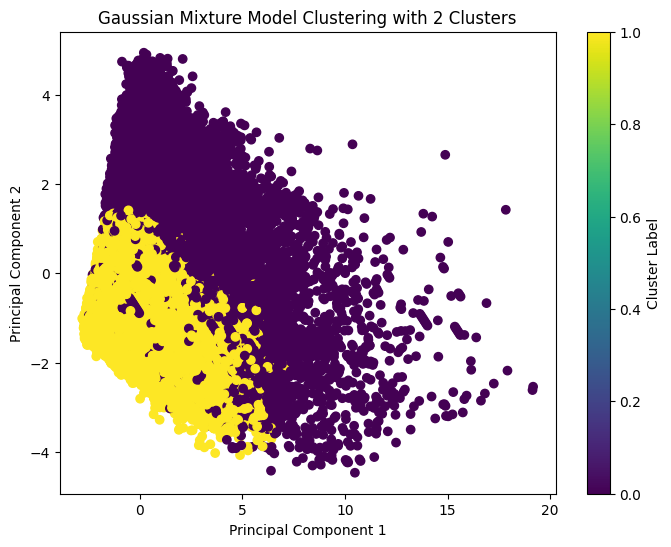

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(gmm_X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_X['cluster'], cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model Clustering with 2 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

# Step 1: Prepare data by dropping 'customer_id' and 'price'
kmeans_X = merged_dataset.drop(columns=['customer_id', 'price'])

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(kmeans_X)

# Step 3: Apply KMeans++ clustering
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)  # You can change n_clusters as needed
kmeans.fit(X_scaled)

# Step 4: Assign clusters to the dataset
kmeans_X = pd.DataFrame(X_scaled, columns=kmeans_X.columns)
kmeans_X['cluster'] = kmeans.labels_

# Show the result
print(kmeans_X.head())

# Cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Step 5: Evaluate Clustering Metrics

# 1. Silhouette Score
silhouette = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette}")

# 2. Adjusted Rand Index (ARI) - Comparing with 'price' as the true labels (need to discretize price)
price_bins = pd.cut(merged_dataset["price"], bins=2, labels=[0, 1])  # Discretizing price into two bins
ari = adjusted_rand_score(price_bins, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari}")

# 3. Davies-Bouldin Index
dbi = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {dbi}")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   order_id  order_status  order_purchase_timestamp  customer_unique_id  \
0  1.369492     -0.107888                 -0.582341           -0.049341   
1  1.369492     -0.107888                 -0.582341           -0.049341   
2  1.369492     -0.107888                 -0.582341           -0.049341   
3 -0.596461     -0.107888                  1.349462            0.640014   
4 -0.762711     -0.107888                  1.447689           -0.941800   

   customer_zip_code_prefix  customer_city  customer_state  order_item_id  \
0                 -1.069658       1.003223        0.893762      -0.280959   
1                 -1.069658       1.003223        0.893762      -0.280959   
2                 -1.069658       1.003223        0.893762      -0.280959   
3                  0.427895      -1.623106       -2.077684      -0.280959   
4                  1.348341       1.378413       -1.511694      -0.280959   

   product_id  seller_id  ...  product_width_cm  payment_sequential  \
0    0.106036  

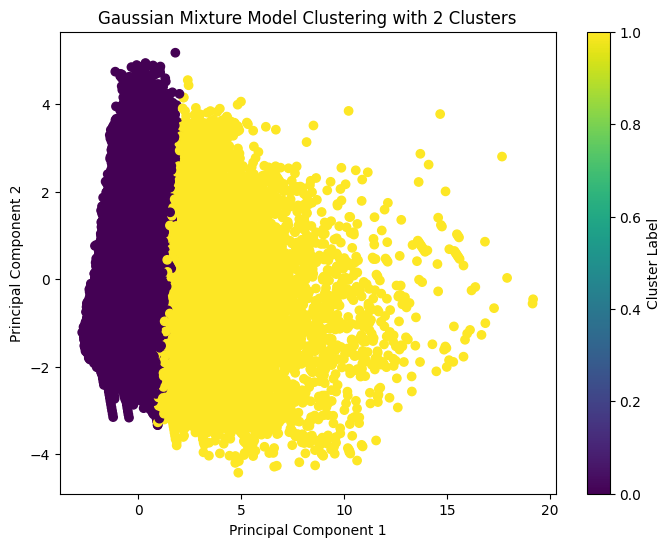

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(kmeans_X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_X['cluster'], cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model Clustering with 2 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()